In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path = '/content/drive/MyDrive/Fruit'
valid_path = '/content/drive/MyDrive/Fruit'
test_path = '/content/drive/MyDrive/Fruit'

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)



train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), 
                                                  batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224),
                                                      batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 96 images belonging to 10 classes.
Found 96 images belonging to 10 classes.
Found 96 images belonging to 10 classes.


In [ ]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

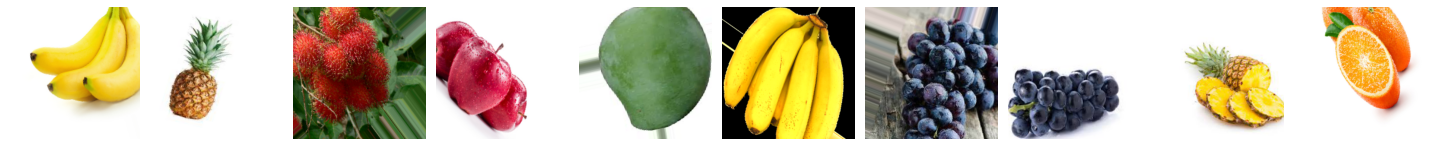

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=10, verbose=1)

Epoch 1/10
 6/10 [=================>............] - ETA: 12s - loss: 2.4384 - accuracy: 0.1000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 39s 4s/step - loss: 2.3895 - accuracy: 0.1354 - val_loss: 2.2740 - val_accuracy: 0.2083
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 2.2666 - accuracy: 0.1354 - val_loss: 2.1258 - val_accuracy: 0.2708
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 2.0547 - accuracy: 0.2500 - val_loss: 1.7747 - val_accuracy: 0.2917
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 1.9101 - accuracy: 0.2292 - val_loss: 1.8180 - val_accuracy: 0.2708
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 1.8089 - accuracy: 0.3125 - val_loss: 1.5656 - val_accuracy: 0.4271
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 1.5751 - accuracy: 0.4375 - val_loss: 1.2822 - val_accuracy: 0.6042
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: 1.2423 - accuracy: 0.5938 - val_loss: 0.9570 - val_accuracy: 0.6771
Epoch 8/10
10/10 [=============